In [1]:
%matplotlib inline

### Import packages

In [2]:
# for calculations
import numpy as np
import scipy as sp
import itertools
from scipy.signal import argrelextrema
import copy

# for plotting
import matplotlib
import matplotlib.pylab as plt
from matplotlib.patches import ConnectionPatch

# suppress text output of functions
from IPython.utils import io

# for fitting
from scipy.optimize import curve_fit

#import warnings
#warnings.filterwarnings("error")

import os
import sys
module_path = os.path.abspath(os.path.join('../pyrot'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import cavity1d as pyrot

### Example system calculation

Define system

In [4]:
tThin = 0.01 #thin layer
N = [1.0,   10.0, 1.0,   10.0, 1.0] # Refractive index of each layer
T = [ -1, tThin, 1.0, tThin,  -1] # Thicknesses of each layer

k = np.linspace(0.001, 15., 200000) # incident frequency / wavenumber

In [5]:
### atom parameters ###
atom_om  = 3.623
atom_om2 = 6.536
atoms_params = [[0.51, 0.01, atom_om,  0.0],
                [0.51, 0.01, atom_om2, 0.0]]

In [6]:
cavity = pyrot.Cavity1d(N, T)
atoms   = pyrot.CavityAtoms1d(N, T, atoms_params)

Calculate **empty cavity** scattering

In [7]:
%%time
R_empty = cavity.reflection_intensity(k)
T_empty = cavity.transmission_intensity(k)

CPU times: user 342 ms, sys: 82 ms, total: 424 ms
Wall time: 425 ms


Calculate reflection minimum

In [8]:
max_inds = argrelextrema(R_empty, np.less)
ref_min  = k[max_inds[0][1]]+0.000001 # small number to avoid divide by zeroes
ref_min2 = k[max_inds[0][2]]+0.000001 # small number to avoid divide by zeroes
print(ref_min)
print(ref_min2)

3.6230526252581265
6.536172970859855


Calculate cavity scattering **with atom**

In [9]:
%%time
R_atoms = atoms.linear_reflection_intensity(k)
print("###")
T_atoms = atoms.linear_transmission_intensity(k)

0 0
0 1
  0 1
0, 1, 0.51, 0.51
[[1], True]
N: [1.0, 10.0, 1.0, array([2691839.62227131 +0.j        , 2504047.64605208 +0.j        ,
       2340748.96293364 +0.j        , ...,       0.        +44.65680347j,
             0.        +44.65634287j,       0.        +44.65588227j]), array([3615522.13462987  +0.j        , 3363290.88047738  +0.j        ,
       3143957.59132995  +0.j        , ...,
             0.        +116.68504836j,       0.        +116.68374476j,
             0.        +116.68244118j]), array([2691839.62227131 +0.j        , 2504047.64605208 +0.j        ,
       2340748.96293364 +0.j        , ...,       0.        +44.65680347j,
             0.        +44.65634287j,       0.        +44.65588227j]), 1.0, 10.0, 1.0]
T: [-1, 0.01, 0.49999999995, 4.137018548132909e-18, 1e-10, -4.137018554595257e-18, 0.49999999995, 0.01, -1]
###
0 0
0 1
  0 1
0, 1, 0.51, 0.51
[[1], True]
N: [1.0, 10.0, 1.0, array([2691839.62227131 +0.j        , 2504047.64605208 +0.j        ,
       2340748.9629336

Print linear refractive index with atom delta approximated as thin layer

In [10]:
n_int, t_int = atoms.linear_layer_system_with_atom(k)
print(n_int)
print(t_int)

0 0
0 1
  0 1
0, 1, 0.51, 0.51
[[1], True]
N: [1.0, 10.0, 1.0, array([2691839.62227131 +0.j        , 2504047.64605208 +0.j        ,
       2340748.96293364 +0.j        , ...,       0.        +44.65680347j,
             0.        +44.65634287j,       0.        +44.65588227j]), array([3615522.13462987  +0.j        , 3363290.88047738  +0.j        ,
       3143957.59132995  +0.j        , ...,
             0.        +116.68504836j,       0.        +116.68374476j,
             0.        +116.68244118j]), array([2691839.62227131 +0.j        , 2504047.64605208 +0.j        ,
       2340748.96293364 +0.j        , ...,       0.        +44.65680347j,
             0.        +44.65634287j,       0.        +44.65588227j]), 1.0, 10.0, 1.0]
T: [-1, 0.01, 0.49999999995, 4.137018548132909e-18, 1e-10, -4.137018554595257e-18, 0.49999999995, 0.01, -1]
[1.0, 10.0, 1.0, array([2691839.62227131 +0.j        , 2504047.64605208 +0.j        ,
       2340748.96293364 +0.j        , ...,       0.        +44.65680347j

### Plot

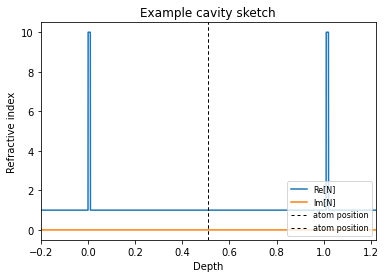

In [11]:
t_tot = np.sum(T[1:-1])
outside_buffer = 0.2
depth = np.linspace(-outside_buffer, t_tot+outside_buffer, 10000)

#cavity.draw_cav(depth)
atoms.draw_cav(depth)

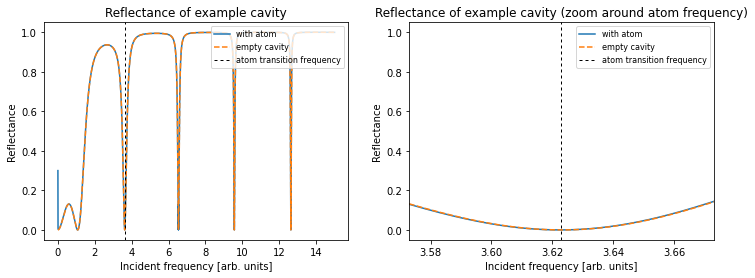

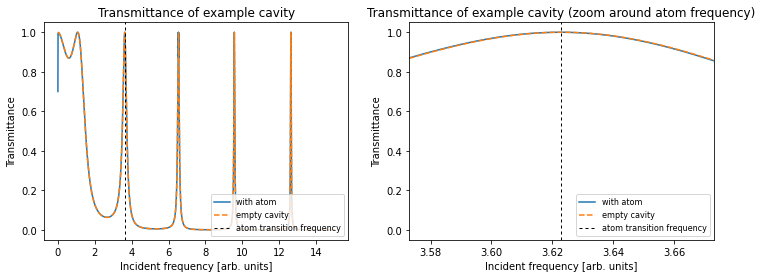

In [12]:
### reflection ###
plt.figure(figsize=(6*2,4))

plt.subplot(121, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of example cavity')
plt.plot(k, R_atoms, label='with atom')
plt.plot(k, R_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')
plt.legend(loc=1, fontsize=8)

plt.subplot(122, xlabel='Incident frequency [arb. units]', ylabel='Reflectance',
            title='Reflectance of example cavity (zoom around atom frequency)')
plt.plot(k, R_atoms, label='with atom')
plt.plot(k, R_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')

zoom_dif = 0.05
plt.xlim([atom_om-zoom_dif, atom_om+zoom_dif])
plt.legend(loc=1, fontsize=8)

plt.show()

### transmission ###
plt.figure(figsize=(6*2,4))

plt.subplot(121, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of example cavity')
plt.plot(k, T_atoms, label='with atom')
plt.plot(k, T_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')
plt.legend(loc=4, fontsize=8)

plt.subplot(122, xlabel='Incident frequency [arb. units]', ylabel='Transmittance',
            title='Transmittance of example cavity (zoom around atom frequency)')
plt.plot(k, T_atoms, label='with atom')
plt.plot(k, T_empty, '--', label='empty cavity')
plt.axvline(atom_om, color='k', dashes=[3,3], lw=1.0, label='atom transition frequency')

zoom_dif = 0.05
plt.xlim([atom_om-zoom_dif, atom_om+zoom_dif])
plt.legend(loc=4, fontsize=8)

plt.show()